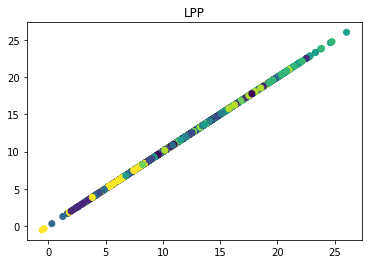

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

def cal_W(data, n_neighbor, t):
    sum_x = np.sum(np.square(data), 1)
    dist = np.add(np.add(-2 * np.dot(data, data.T), sum_x).T, sum_x)
    rbf_dist = np.exp(-(dist/t))
    dist[dist<0] = 0
    n = dist.shape[0]
    W = np.zeros((n,n))
    for i in range(n):
        index_ = np.argsort(dist[i])[1:1 + n_neighbor]
        W[i, index_] = rbf_dist[i, index_]
        W[index_, i] = rbf_dist[index_, i] 
    return W

def LPP(data, n_dim , n_neighbor, t):
    M = data.shape[0]
    W = cal_W(data, n_neighbor, t)
    D = np.zeros_like(W)
    for i in range(M):
        D[i,i] = np.sum(W[i])
    L = D - W
    XDXT = np.dot(np.dot(data.T, D), data)
    XLXT = np.dot(np.dot(data.T, L), data)
    val, vec = np.linalg.eig(np.dot(np.linalg.pinv(XDXT),XLXT))
    index = np.argsort(np.abs(val))
    val = val[index]
    j = 0
    while val[j] < 1e-6:
        j+=1
    index = index[j:j+n_dim]
    vec_new = vec[:,index]
    data_new = np.dot(data, vec_new)
    
    return data_new
    
X = load_digits().data
# X = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])

y = load_digits().target

data_new = LPP(X, n_dim = 2, n_neighbor = 5, t = 1)

plt.figure
plt.title('LPP')
plt.scatter(data_new[:,0], data_new[:,1], c = y)
    